#Week10 EDA

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p '/content/drive/MyDrive/Data_Glacier_Data_Analyst_2024/week10/'
%cd '/content/drive/MyDrive/Data_Glacier_Data_Analyst_2024/week10/'

Mounted at /content/drive
/content/drive/MyDrive/Data_Glacier_Data_Analyst_2024/week10


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data_Glacier_Data_Analyst_2024/week10/cleaned_customer_segmentation.csv")

In [4]:
df.head()

,fecha_dato,ncodpers,Employee_index:_A_active_B_ex_employed_F_filial_N_not_employee_P_pasive,Customer_s_Country_residence,sexo,age,fecha_alta,New_customer_Index,Customer_seniority,indrel,Customer_type_at_the_beginning_of_the_month,Customer_relation_type_at_the_beginning_of_the_month,Residence_index,Foreigner index,channel_used_by_the_customer_to_join,Deceased_index,Addres_type,Province_code,Province_name,Activity_index,Gross_income_of_the_household,Saving_Account,Guarantees,Current_Accounts,Derivada_Account,Payroll_Account,Junior_Account,Más_particular_Account,particular_Account,particular_Plus_Account,Short-term_deposits,Medium-term_deposits,Long-term_deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions.1,Direct_Debit
0,2015-01-28,1375586.0,N,ES,H,35,2015-01-12,0.0,6,1.0,1.0,A,S,N,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-28,1050611.0,N,ES,V,23,2012-08-10,0.0,35,1.0,1.0,I,S,S,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-28,1050612.0,N,ES,V,23,2012-08-10,0.0,35,1.0,1.0,I,S,N,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-28,1050613.0,N,ES,H,22,2012-08-10,0.0,35,1.0,1.0,I,S,N,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-28,1050614.0,N,ES,V,23,2012-08-10,0.0,35,1.0,1.0,A,S,N,KHE,N,1.0,50.0,ZARAGOZA,1.0,106651.86,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
print(df['Province_code'].dtype)

float64


In [7]:
print(df['Gross_income_of_the_household'].dtype)

float64


In [8]:
print(df['age'].dtype)

object


In [9]:
print(df['age'].unique())

[' 35' ' 23' ' 22' ' 24' ' 65' ' 28' ' 25' ' 26' ' 53' ' 27' ' 32' ' 37'
 ' 31' ' 39' ' 63' ' 33' ' 55' ' 42' ' 58' ' 38' ' 50' ' 30' ' 45' ' 44'
 ' 36' ' 29' ' 60' ' 57' ' 67' ' 47' ' NA' ' 34' ' 48' ' 46' ' 54' ' 84'
 ' 15' ' 12' '  8' '  6' ' 83' ' 40' ' 77' ' 69' ' 52' ' 59' ' 43' ' 10'
 '  9' ' 49' ' 41' ' 51' ' 78' ' 16' ' 11' ' 73' ' 62' ' 66' ' 17' ' 68'
 ' 82' ' 95' ' 96' ' 56' ' 61' ' 79' ' 72' ' 14' ' 19' ' 13' ' 86' ' 64'
 ' 20' ' 89' ' 71' '  7' ' 70' ' 74' ' 21' ' 18' ' 75' '  4' ' 80' ' 81'
 '  5' ' 76' ' 92' ' 93' ' 85' ' 91' ' 87' ' 90' ' 94' ' 99' ' 98' ' 88'
 ' 97' '100' '101' '106' '103' '  3' '  2' '102' '104' '111' '107' '109'
 '105' '112' '115' '110' '116' '108' '113']


**Insight**  
It seems 'age' variable included 'NA' even though it does not show in the isnull checker. Conver them to float and then fill in the 'NA'.  

In [10]:
df['age'] = pd.to_numeric(df['age'], errors='coerce') #convert the age datatype to numeric

In [11]:
df['age'] = df['age'].fillna(df['age'].median())
print(df['age'].dtype)

float64


In [12]:
df['age'] = df['age'].astype(int)
print(df['age'].dtype)

int64


In [13]:
print(df['Customer_seniority'].unique())

['      6' '     35' '     34' '     NA' '     33' '     31' '     21'
 '     16' '     27' '      9' '     22' '     13' '     29' '      8'
 '     11' '     10' '     28' '     24' '      7' '     25' '     14'
 '     26' '     12' '     23' '      1' '     18' '      4' '      3'
 '     17' '     32' '     30' '     20' '     15' '     19' '    157'
 '     36' '      5' '     40' '     38' '     37' '     39' '      0'
 '      2' '     47' '     44' '     42' '     46' '     45' '     43'
 '     41' '     57' '     48' '     52' '     49' '     50' '     56'
 '     58' '     51' '     55' '     54' '     53' '     59' '     62'
 '     61' '     60' '     63' '    139' '    165' '    118' '    164'
 '    142' '     94' '    159' '    143' '    105' '    151' '    162'
 '    137' '    150' '    128' '    122' '    156' '    119' '    160'
 '     79' '     95' '    132' '    161' '     98' '    127' '     72'
 '    155' '    108' '    163' '    102' '    148' '    115' '    146'
 '    

**Insight**  
It seems 'Customer_seniority' variable also included 'NA' even though it does not show in the isnull checker. Conver them to float and then fill in the 'NA'.  

In [14]:
df['Customer_seniority'] = pd.to_numeric(df['Customer_seniority'], errors='coerce') #convert the age datatype to numeric

In [15]:
df['Customer_seniority'] = df['Customer_seniority'].fillna(df['Customer_seniority'].median())
print(df['Customer_seniority'].dtype)

float64


In [16]:
df['Customer_seniority'] = df['Customer_seniority'].astype(int)
print(df['Customer_seniority'].dtype)

int64


convert the variables of float type with no including decimals to int type.

In [17]:
df[['ncodpers', 'New_customer_Index', 'indrel', 'Customer_type_at_the_beginning_of_the_month', 'Addres_type', 'Province_code', 'Activity_index']] = df[['ncodpers', 'New_customer_Index', 'indrel', 'Customer_type_at_the_beginning_of_the_month', 'Addres_type', 'Province_code', 'Activity_index']].astype(int)

In [18]:
df[['Saving_Account', 'Guarantees', 'Current_Accounts', 'Derivada_Account', 'Payroll_Account', 'Junior_Account', 'Más_particular_Account']] = df[['Saving_Account', 'Guarantees', 'Current_Accounts', 'Derivada_Account', 'Payroll_Account', 'Junior_Account', 'Más_particular_Account']].astype(int)

In [19]:
df[['particular_Account', 'particular_Plus_Account', 'Short-term_deposits', 'Medium-term_deposits', 'Long-term_deposits', 'e-account', 'Funds']] = df[['particular_Account', 'particular_Plus_Account', 'Short-term_deposits', 'Medium-term_deposits', 'Long-term_deposits', 'e-account', 'Funds']].astype(int)

In [20]:
df[['Mortgage', 'Pensions', 'Loans', 'Taxes', 'Credit_Card', 'Securities', 'Home_Account']] = df[['Mortgage', 'Pensions', 'Loans', 'Taxes', 'Credit_Card', 'Securities', 'Home_Account']].astype(int)

In [21]:
df[['Payroll', 'Pensions.1', 'Direct_Debit']] = df[['Payroll', 'Pensions.1', 'Direct_Debit']].astype(int)

In [22]:
cols_obj = df.select_dtypes(['object'])

for i in cols_obj.columns:
  print('Unique values in', i, 'are :')
  print(df[i].value_counts())
  print('*'*40)

Unique values in fecha_dato are :
fecha_dato
2015-01-28    625457
2015-02-28    374543
Name: count, dtype: int64
****************************************
Unique values in Employee_index:_A_active_B_ex_employed_F_filial_N_not_employee_P_pasive are :
Employee_index:_A_active_B_ex_employed_F_filial_N_not_employee_P_pasive
N    999042
B       387
A       287
F       282
S         2
Name: count, dtype: int64
****************************************
Unique values in Customer_s_Country_residence are :
Customer_s_Country_residence
ES    993046
FR       546
AR       542
DE       487
GB       480
       ...  
TN         2
LB         2
GE         2
BZ         2
AL         1
Name: count, Length: 113, dtype: int64
****************************************
Unique values in sexo are :
sexo
V    572786
H    427214
Name: count, dtype: int64
****************************************
Unique values in fecha_alta are :
fecha_alta
2013-10-14    14702
2013-08-03     3738
2014-07-28     3285
2014-10-03     2861

In [24]:
df.rename({'Employee_index:_A_active_B_ex_employed_F_filial_N_not_employee_P_pasive':'Employee_or_not', 'Foreigner index':'Foreigner_index', 'ncodpers':'customer_id'}, axis=1, inplace=True)
df

,fecha_dato,customer_id,Employee_or_not,Customer_s_Country_residence,sexo,age,fecha_alta,New_customer_Index,Customer_seniority,indrel,Customer_type_at_the_beginning_of_the_month,Customer_relation_type_at_the_beginning_of_the_month,Residence_index,Foreigner_index,channel_used_by_the_customer_to_join,Deceased_index,Addres_type,Province_code,Province_name,Activity_index,Gross_income_of_the_household,Saving_Account,Guarantees,Current_Accounts,Derivada_Account,Payroll_Account,Junior_Account,Más_particular_Account,particular_Account,particular_Plus_Account,Short-term_deposits,Medium-term_deposits,Long-term_deposits,e-account,Funds,Mortgage,Pensions,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions.1,Direct_Debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1,1,A,S,N,KHL,N,1,29,MALAGA,1,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1,1,I,S,S,KHE,N,1,13,CIUDAD REAL,0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1,1,I,S,N,KHE,N,1,13,CIUDAD REAL,0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1,1,I,S,N,KHD,N,1,50,ZARAGOZA,0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1,1,A,S,N,KHE,N,1,50,ZARAGOZA,1,106651.86,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2015-02-28,1183296,N,ES,H,27,2013-09-25,0,22,1,1,A,S,N,KFC,N,1,28,MADRID,1,55516.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
999996,2015-02-28,1183295,N,ES,H,56,2013-09-25,0,22,1,1,A,S,N,KFC,N,1,15,"CORUÑA, A",1,75654.84,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
999997,2015-02-28,1183294,N,ES,V,39,2013-09-25,0,22,1,1,A,S,N,KFC,N,1,15,"CORUÑA, A",1,80634.87,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
999998,2015-02-28,1183293,N,ES,V,36,2013-09-25,0,22,1,1,A,S,S,KFC,N,1,28,MADRID,1,57818.46,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 45 columns):
 #   Column                                                Non-Null Count    Dtype  
---  ------                                                --------------    -----  
 0   fecha_dato                                            1000000 non-null  object 
 1   customer_id                                           1000000 non-null  int64  
 2   Employee_or_not                                       1000000 non-null  object 
 3   Customer_s_Country_residence                          1000000 non-null  object 
 4   sexo                                                  1000000 non-null  object 
 5   age                                                   1000000 non-null  int64  
 6   fecha_alta                                            1000000 non-null  object 
 7   New_customer_Index                                    1000000 non-null  int64  
 8   Customer_seniority               

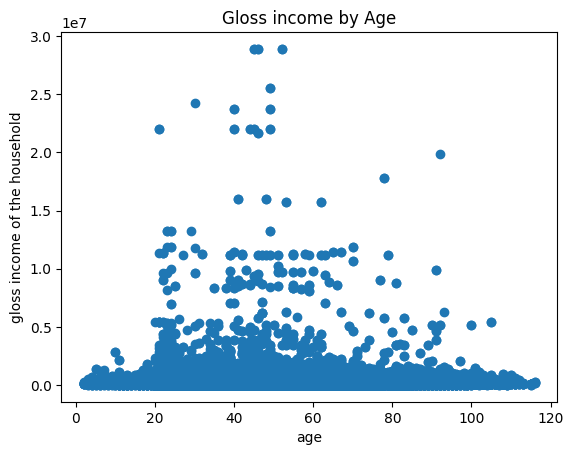

In [26]:
plt.scatter(df['age'], df['Gross_income_of_the_household'])
plt.xlabel('age')
plt.ylabel('gloss income of the household')
plt.title('Gloss income by Age')
plt.show()

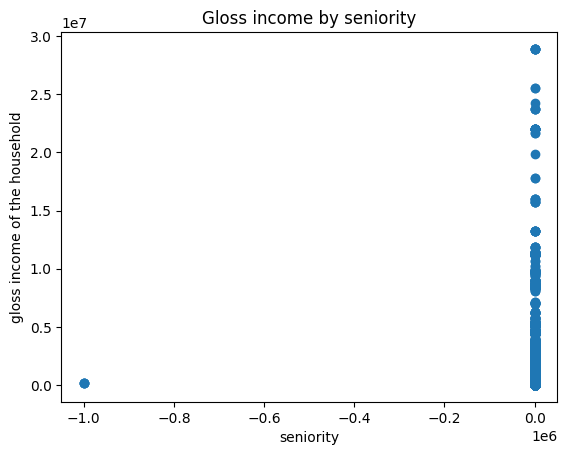

In [27]:
plt.scatter(df['Customer_seniority'], df['Gross_income_of_the_household'])
plt.xlabel('seniority')
plt.ylabel('gloss income of the household')
plt.title('Gloss income by seniority')
plt.show()

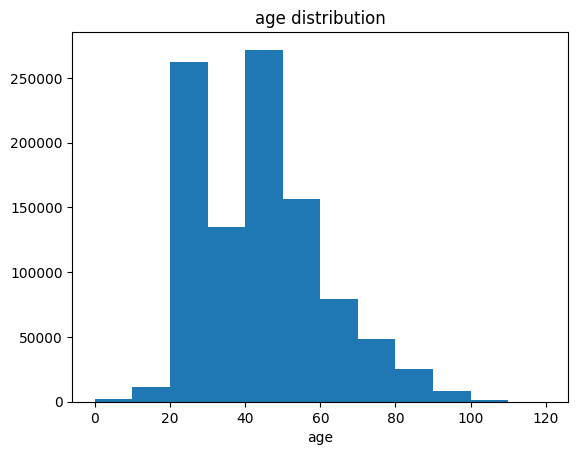

In [28]:
plt.hist(df['age'], bins = list(range(0,130,10)))
plt.xlabel('age')
plt.title('age distribution')
plt.show()

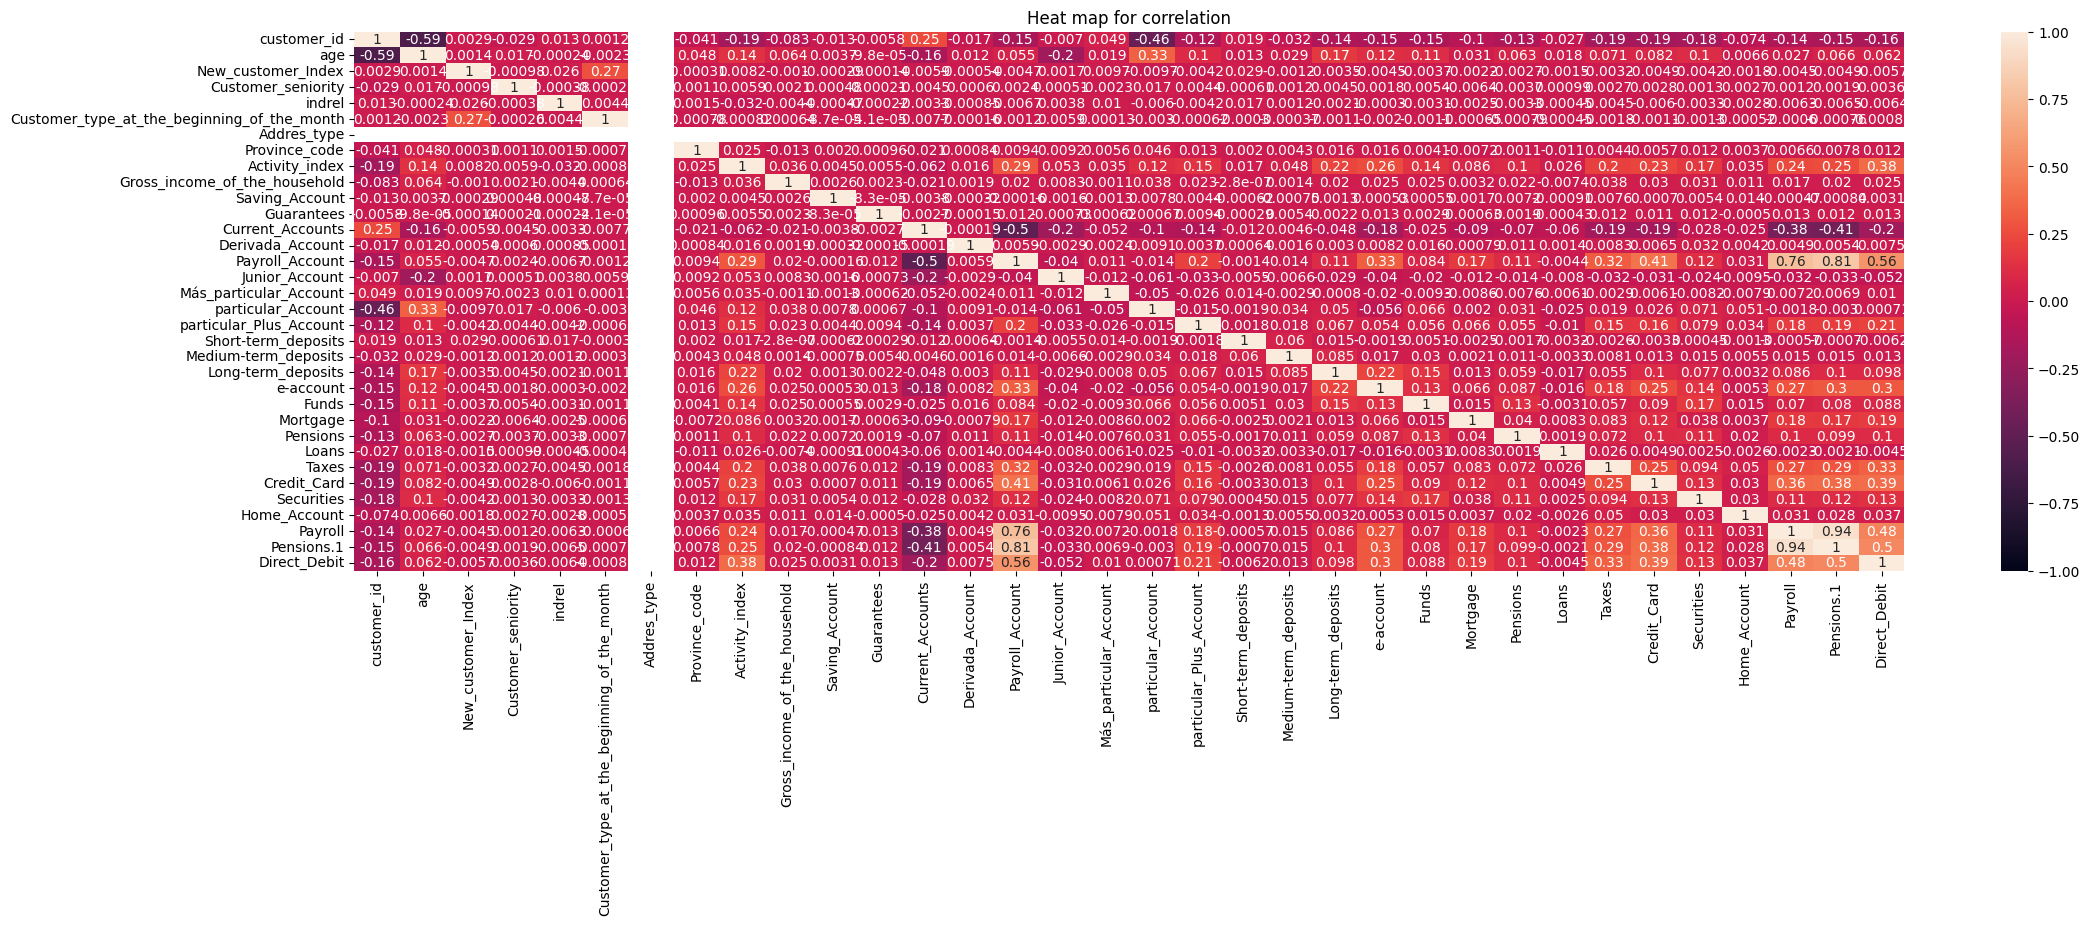

In [29]:
plt.figure(figsize = (25, 7))
numeric_df = df.select_dtypes(include=[float, int])
sns.heatmap(numeric_df.corr(), annot = True, vmin = -1, vmax = 1)
plt.title('Heat map for correlation')
plt.show()

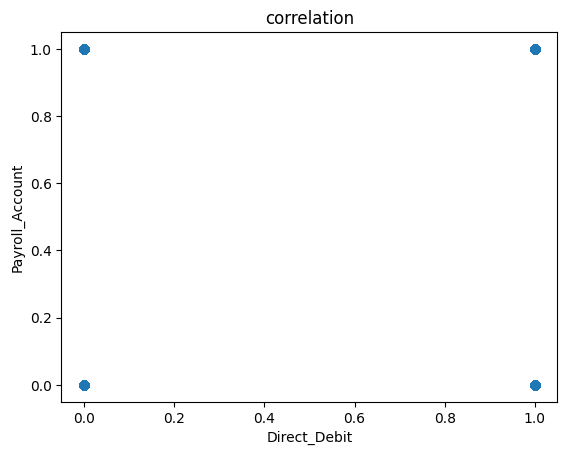

In [30]:
plt.scatter(df['Direct_Debit'], df['Payroll_Account'])
plt.xlabel('Direct_Debit')
plt.ylabel('Payroll_Account')
plt.title('correlation')
plt.show()

In [31]:
df.to_csv("cleaned_customer_segmentation2.csv")

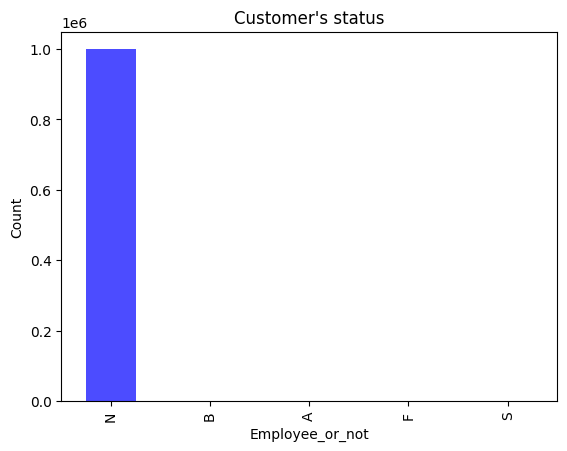

In [32]:
status_count = df['Employee_or_not'].value_counts()
status_count.plot(kind='bar', color=['blue', 'pink','orange','yellow'], alpha=0.7)
plt.xlabel('Employee_or_not')
plt.ylabel('Count')
plt.title('Customer\'s status')
plt.show()

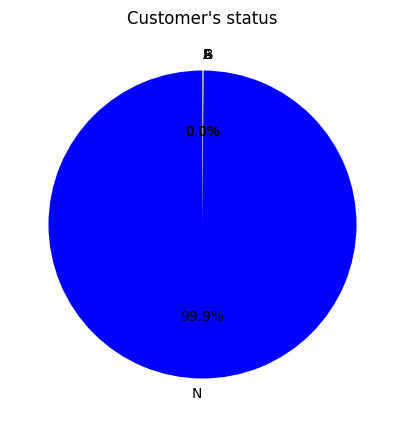

In [33]:
status_count.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['blue', 'pink','orange','yellow'],
    startangle=90,
    figsize=(5, 5)
)

plt.ylabel('')
plt.title('Customer\'s status')
plt.show()

**Insight**  
Employee index: A active, B ex employed, F filial, N not employee, P passive  
Most of the customers are N as not employees.   


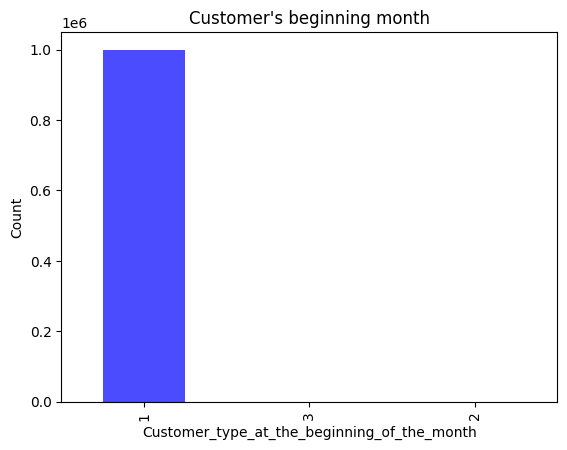

In [34]:
customer_type_count = df['Customer_type_at_the_beginning_of_the_month'].value_counts()
customer_type_count.plot(kind='bar', color=['blue', 'pink','orange','yellow','gray'], alpha=0.7)
plt.xlabel('Customer_type_at_the_beginning_of_the_month')
plt.ylabel('Count')
plt.title('Customer\'s beginning month')
plt.show()

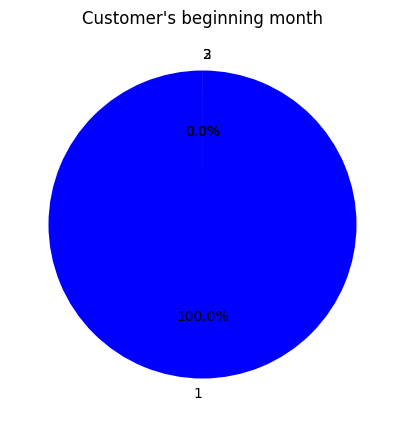

In [35]:
customer_type_count.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['blue', 'pink','orange','yellow','gray'],
    startangle=90,
    figsize=(5, 5)
)

plt.ylabel('')
plt.title('Customer\'s beginning month')
plt.show()

**Insight**  
Customer type at the beginning of the month ,1 (First/Primary customer), 2
(co-owner ),P (Potential),3 (former primary), 4(former co-owner)  
Most of customers are 1 (First/Primary customer).  


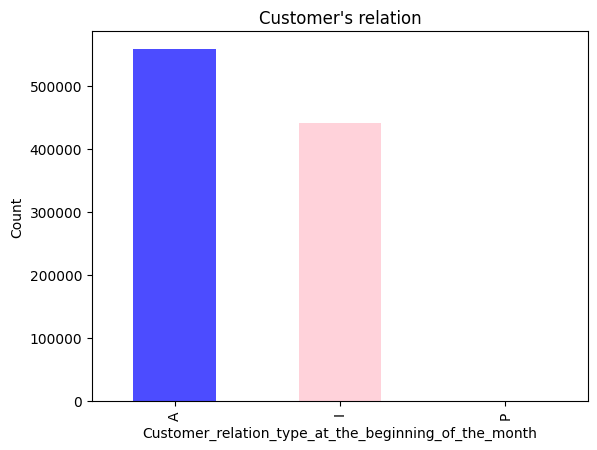

In [36]:
customer_relation_count = df['Customer_relation_type_at_the_beginning_of_the_month'].value_counts()
customer_relation_count.plot(kind='bar', color=['blue', 'pink','orange','yellow','gray'], alpha=0.7)
plt.xlabel('Customer_relation_type_at_the_beginning_of_the_month')
plt.ylabel('Count')
plt.title('Customer\'s relation')
plt.show()

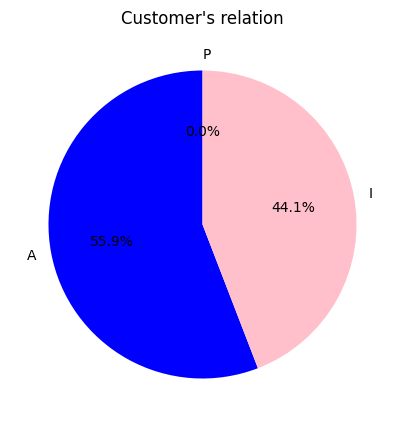

In [37]:
customer_relation_count.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['blue', 'pink','orange','yellow','gray'],
    startangle=90,
    figsize=(5, 5)
)

plt.ylabel('')
plt.title('Customer\'s relation')
plt.show()

**Insight**  
Customer relation type at the beginning of the month, A (active), I (inactive),
P (former customer),R (Potential)  
A (active) customers: 55.9%  
I (inactive) customers: 44.1%  

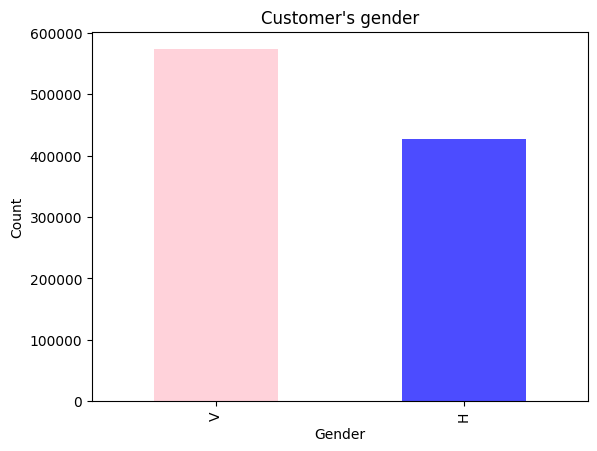

In [38]:
gender_count = df['sexo'].value_counts()
gender_count.plot(kind='bar', color=['pink', 'blue'], alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Customer\'s gender')
plt.show()

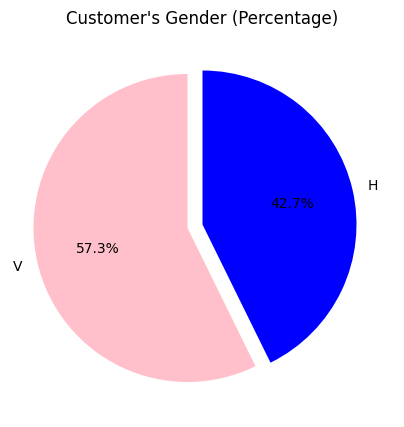

In [39]:
gender_count.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['pink', 'blue'],
    startangle=90,
    figsize=(5, 5),
    explode=(0.1, 0)
)

plt.ylabel('')
plt.title('Customer\'s Gender')
plt.show()

**Insight**   
Female(V) is 57.3% which is relatively larger amount compared to male(H) 42.7%.

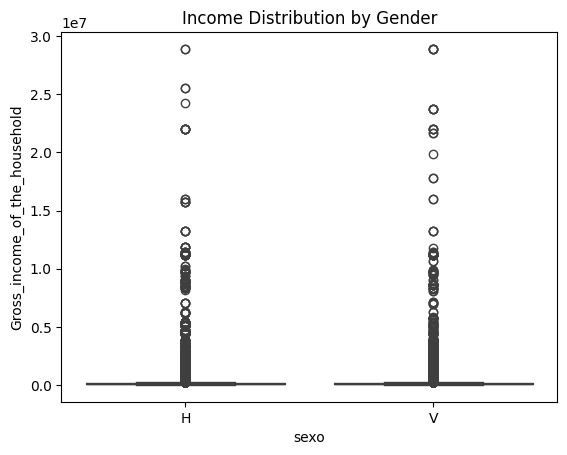

In [40]:
sns.boxplot(x='sexo', y='Gross_income_of_the_household', data=df)
plt.title('Income Distribution by Gender')
plt.show()

**insight**  
There are no significant differences in the distribution of gross income between Male(H) and Female(V).   However, it seems slightly Female has more outliers concentrated above the median.

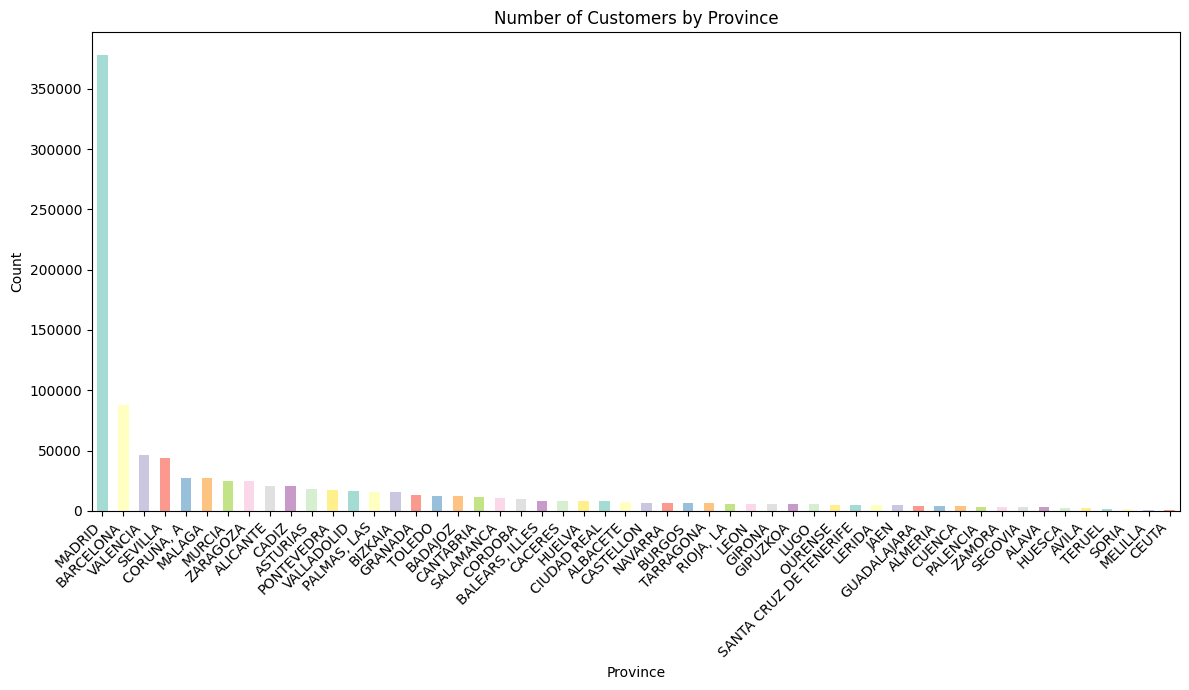

In [41]:
import seaborn as sns
country_count = df['Province_name'].value_counts()
colors = sns.color_palette('Set3', len(country_count))

country_count.plot(kind='bar', alpha=0.8, figsize=(12, 7), color=colors)
plt.xlabel('Province')
plt.ylabel('Count')
plt.title('Number of Customers by Province')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

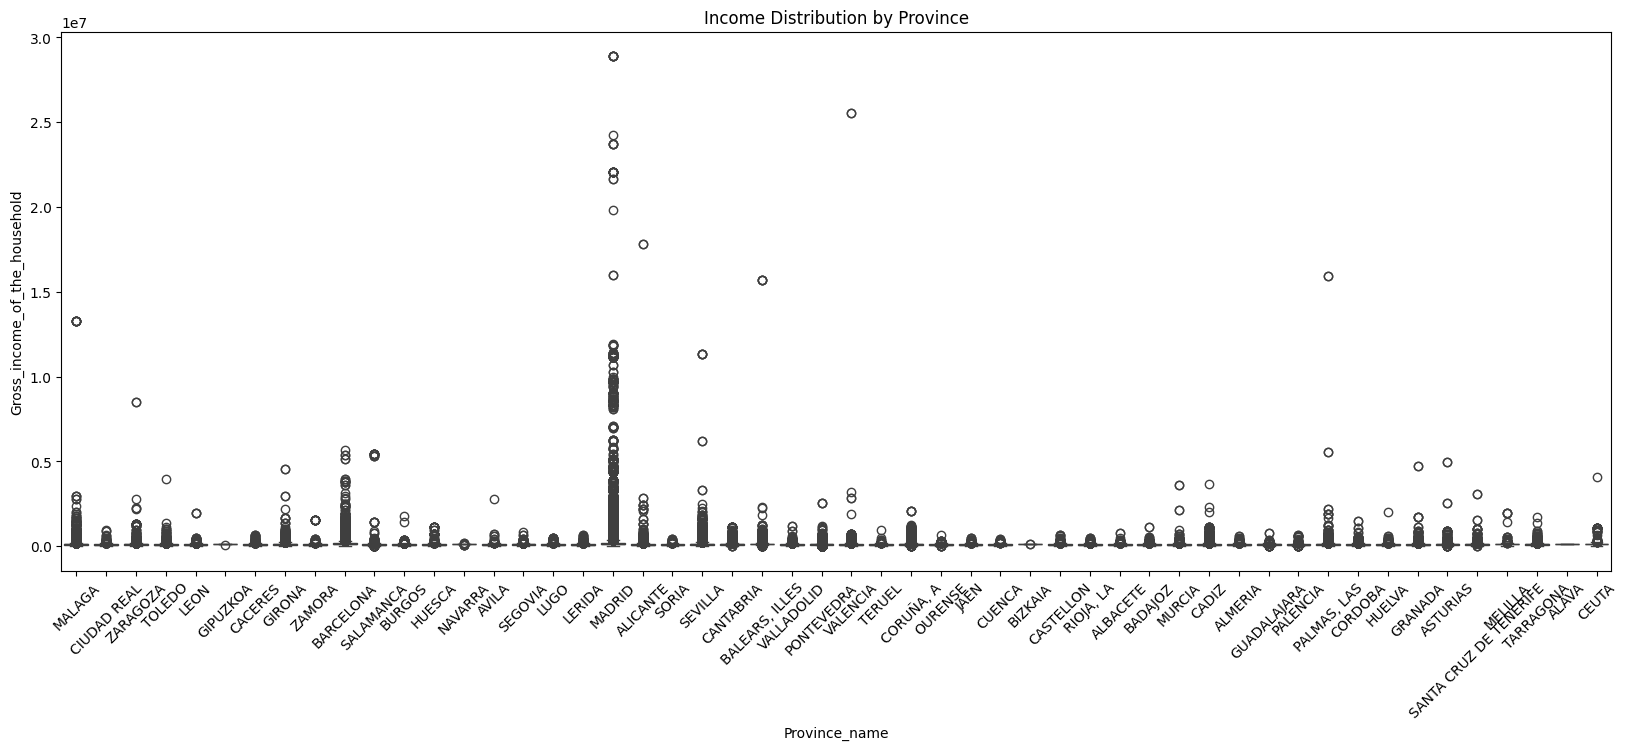

In [42]:
plt.figure(figsize = (20, 7))
sns.boxplot(x='Province_name', y='Gross_income_of_the_household', data=df)
plt.title('Income Distribution by Province')
plt.xticks(rotation=45)
plt.show()

**Insight**  
Madrid has the highest population of customers and the highest gross income household. Especially, a lot of outliers exist in Madrid.

<ipython-input-43-57bfe11828fe>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Province_name', y='Gross_income_of_the_household', data=province_income, palette='Set3')


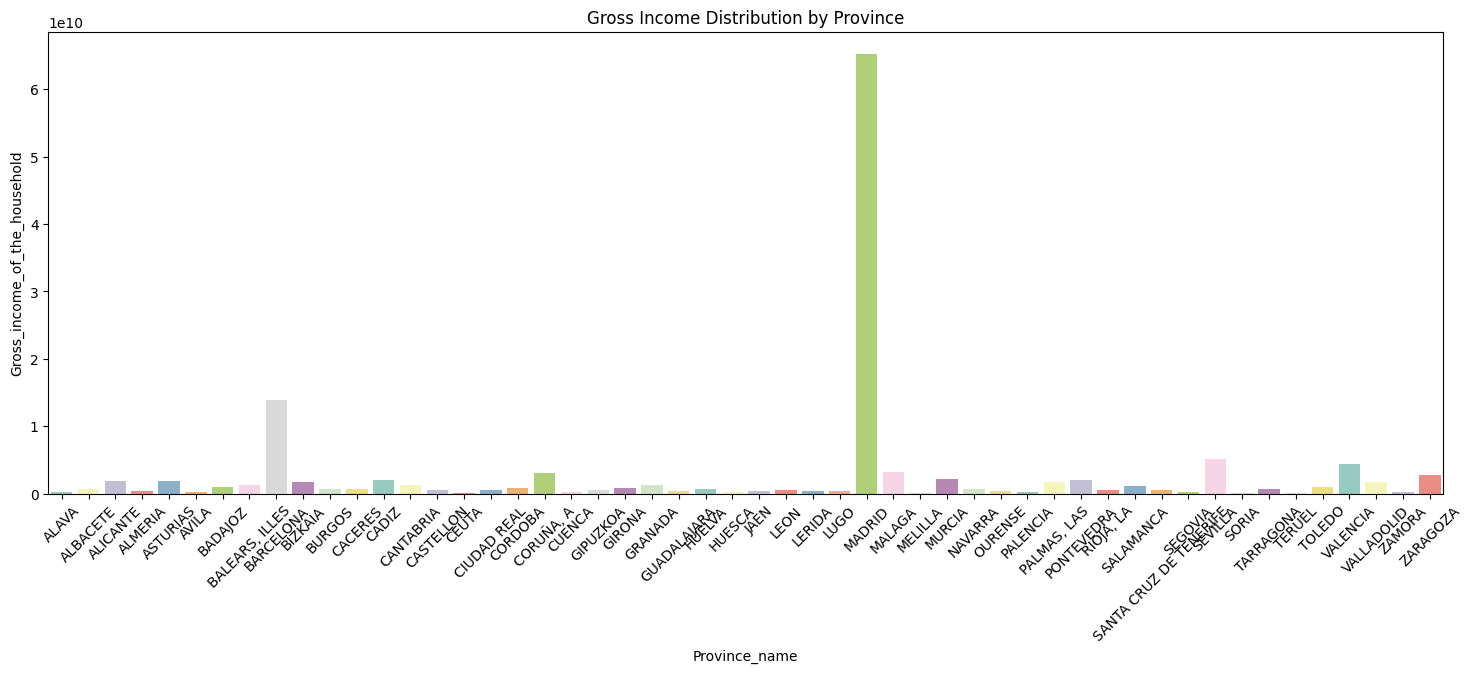

In [43]:
province_income = df.groupby('Province_name')['Gross_income_of_the_household'].sum().reset_index()

plt.figure(figsize=(18, 6))
sns.barplot(x='Province_name', y='Gross_income_of_the_household', data=province_income, palette='Set3')
plt.title('Gross Income Distribution by Province')
plt.xticks(rotation=45)
plt.show()

In [44]:
print(df['age'].dtype)

int64


In [45]:
def add_life_column(age):
  if age <20:
      return 'young'
  elif (21 <= age <= 40):
      return 'lower_adult'
  elif (41 <= age <= 60):
      return 'upper_adult'
  else:
      return 'senior'
df['life_stage'] = df['age'].apply(add_life_column)

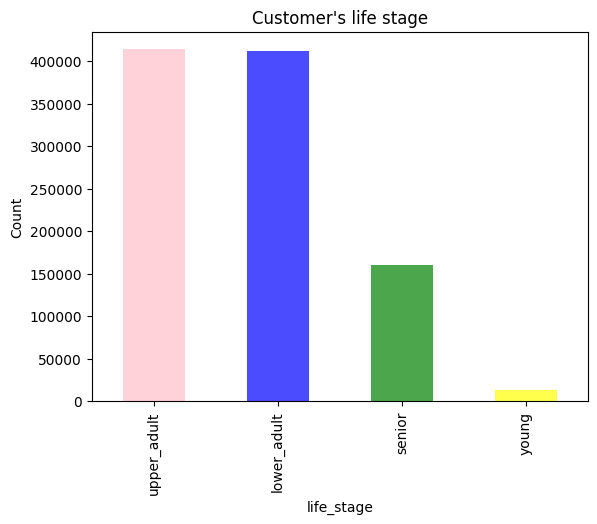

In [46]:
life_stage_count = df['life_stage'].value_counts()
life_stage_count.plot(kind='bar', color=['pink', 'blue', 'green', 'yellow'], alpha=0.7)
plt.xlabel('life_stage')
plt.ylabel('Count')
plt.title('Customer\'s life stage')
plt.show()

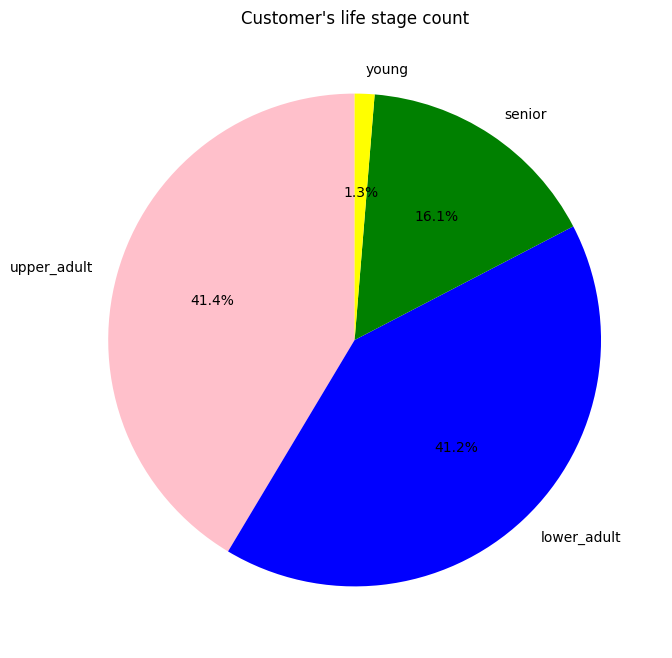

In [47]:
life_stage_count.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['pink', 'blue', 'green', 'yellow'],
    startangle=90,
    figsize=(8, 8)
)

plt.ylabel('')
plt.title('Customer\'s life stage count')
plt.show()

**Insight**  
Majority of this bank customer is adult(20-60years old). On the other hand, young( under 20 years old) is only 1.3% shared.

<ipython-input-48-6e142384ebb9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='life_stage', y='Gross_income_of_the_household', data=lifestage_income, palette='Set3')


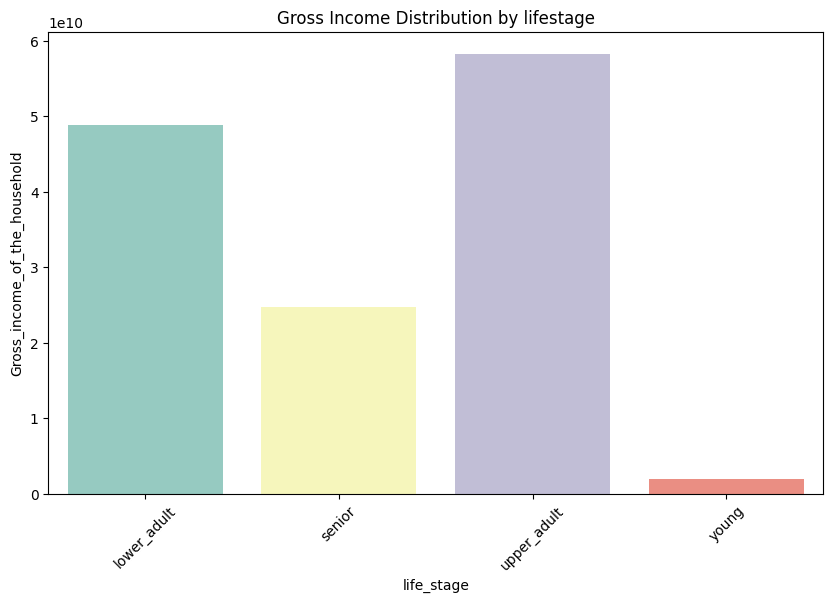

In [48]:
lifestage_income = df.groupby('life_stage')['Gross_income_of_the_household'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='life_stage', y='Gross_income_of_the_household', data=lifestage_income, palette='Set3')
plt.title('Gross Income Distribution by lifestage')
plt.xticks(rotation=45)
plt.show()

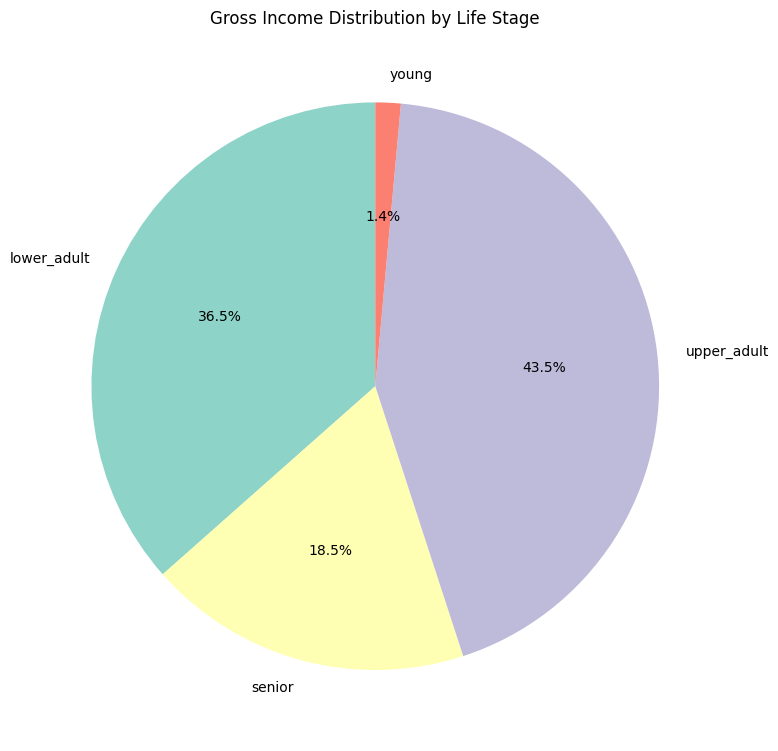

In [49]:
total_income = lifestage_income['Gross_income_of_the_household'].sum()
lifestage_income['Percentage'] = (lifestage_income['Gross_income_of_the_household'] / total_income) * 100

plt.figure(figsize=(8, 8))
plt.pie(
    lifestage_income['Gross_income_of_the_household'],
    labels=lifestage_income['life_stage'],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Set3.colors
)

plt.title('Gross Income Distribution by Life Stage')
plt.tight_layout()
plt.show()

In [50]:
df['Customer_seniority'] =df['Customer_seniority'].replace([-999999], 0)

In [51]:
print(df['Customer_seniority'].dtype)

int64


In [52]:
df['Customer_seniority'] = pd.to_numeric(df['Customer_seniority'], errors='coerce')

<ipython-input-53-8a69cfa52fb1>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seniority_income_binned = df.groupby('Customer_seniority_binned')['Gross_income_of_the_household'].sum().reset_index()
<ipython-input-53-8a69cfa52fb1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_seniority_binned', y='Gross_income_of_the_household', data=seniority_income_binned, palette='Set3')


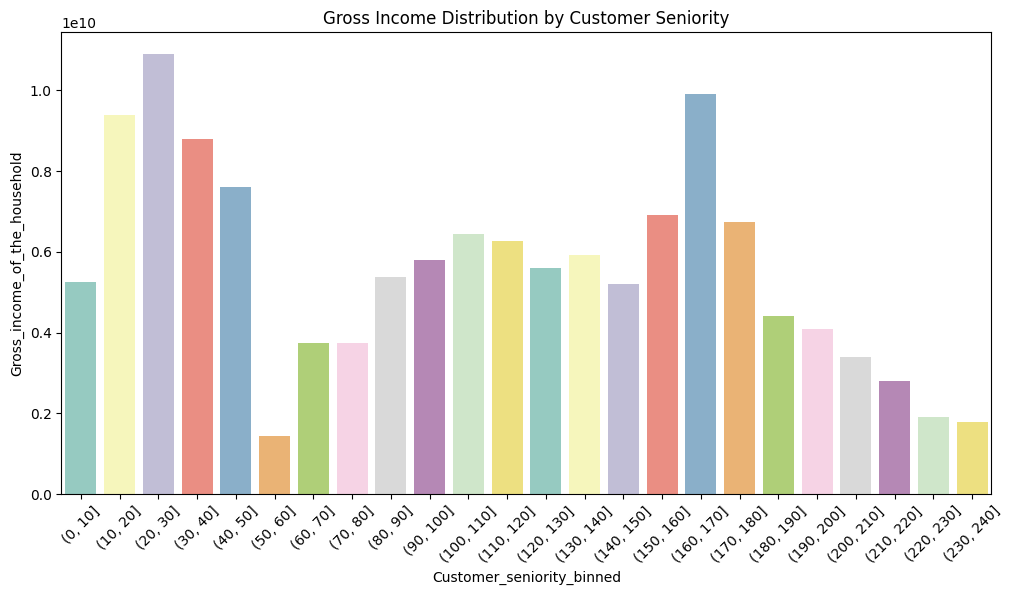

In [53]:
df['Customer_seniority_binned'] = pd.cut(df['Customer_seniority'], bins= list(range(0,250,10)))

seniority_income_binned = df.groupby('Customer_seniority_binned')['Gross_income_of_the_household'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Customer_seniority_binned', y='Gross_income_of_the_household', data=seniority_income_binned, palette='Set3')
plt.title('Gross Income Distribution by Customer Seniority')
plt.xticks(rotation=45)
plt.show()

**Insight**  
The highest group of customer seniority is 20-30 months. The next highest group is 160-170 months. The lowest group is 50-60 months. It may be some restrictions existing in this term such as some promotions being ended. From 180-240 months(15-20 years), there is a trend to decrease the number of seniority that indicates this bank cannot retain customers for the long term.

In [54]:
df['life_stage_province']=df['life_stage'] + "/ " + df['Province_name']

<ipython-input-55-304398a9ff7e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='life_stage_province', y='Gross_income_of_the_household', data=top_10, palette='Set3')


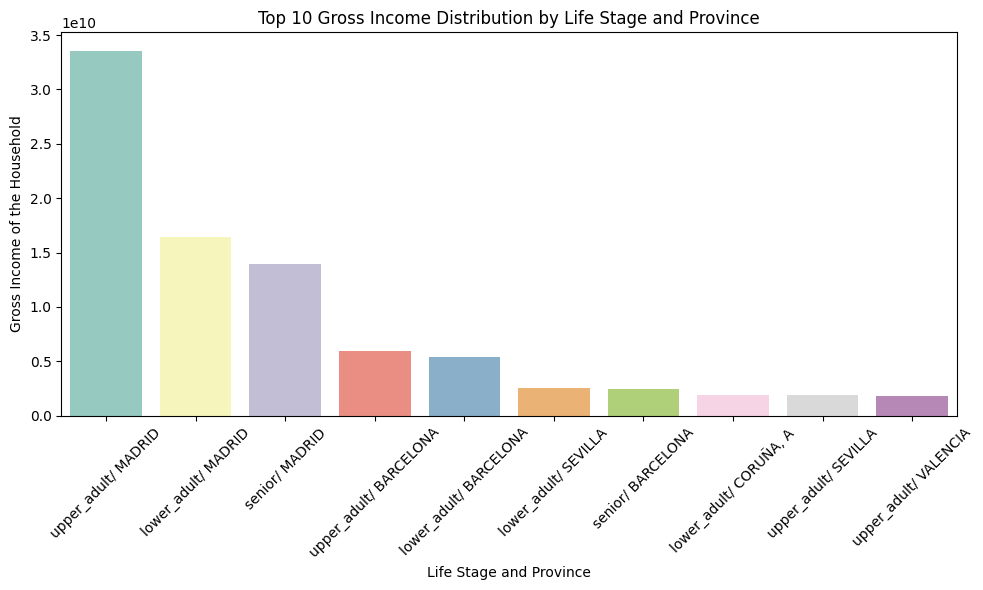

In [55]:
lifestage_province_income = df.groupby('life_stage_province')['Gross_income_of_the_household'].sum().reset_index()

top_10 = lifestage_province_income.nlargest(10, 'Gross_income_of_the_household')

plt.figure(figsize=(10, 6))
sns.barplot(x='life_stage_province', y='Gross_income_of_the_household', data=top_10, palette='Set3')

plt.title('Top 10 Gross Income Distribution by Life Stage and Province')
plt.xlabel('Life Stage and Province')
plt.ylabel('Gross Income of the Household')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insight**  
Regardless of the life stage group, customers who live in MADRID have the highest income. The customers who live in BARCELONA seem 2nd highest income group. But the life stage of the young is the minority in the any of provinces. There are no young life stage groups in this observation.  

In [56]:
df['Mortgage'].head()

,Mortgage
0,0
1,0
2,0
3,0
4,0


<ipython-input-57-a24f4c0e4197>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='life_stage_province', y='Mortgage', data=top_10, palette='Set3')


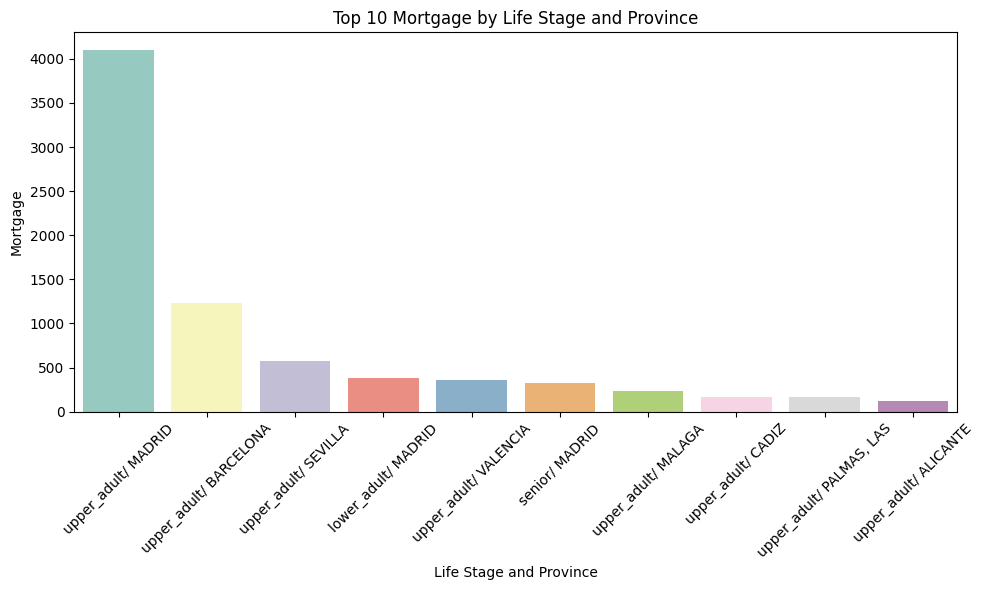

In [57]:
lifestage_province_mortgage = df.groupby('life_stage_province')['Mortgage'].sum().reset_index()

top_10 = lifestage_province_mortgage.nlargest(10, 'Mortgage')

plt.figure(figsize=(10, 6))
sns.barplot(x='life_stage_province', y='Mortgage', data=top_10, palette='Set3')

plt.title('Top 10 Mortgage by Life Stage and Province')
plt.xlabel('Life Stage and Province')
plt.ylabel('Mortgage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**  
High income customers also have more Mortgage compared to low income customers. This plot relatively correlated to the plot of Gross Income Distribution by Life Stage and Province.   
But when we check the actual correlation of Gross income and Mortgage, there is no insight about it. When checked the outliers in the previous weeks, there were outliers for Mortgage. Probably, these high income residences are the range of the outlier of Gross income.

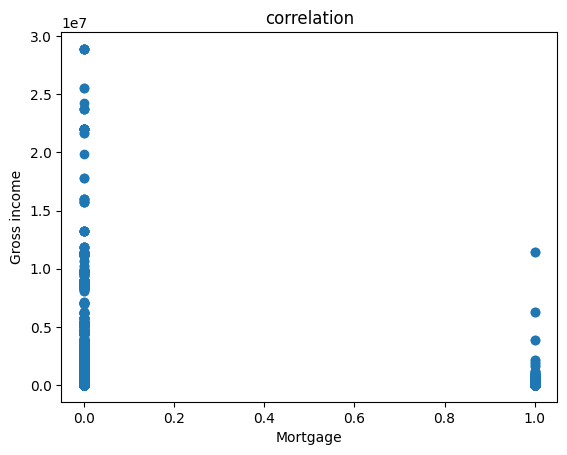

In [58]:
plt.scatter(df['Mortgage'], df['Gross_income_of_the_household'])
plt.xlabel('Mortgage')
plt.ylabel('Gross income')
plt.title('correlation')
plt.show()

<ipython-input-59-ac57fff3d721>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='life_stage_province', y='Loans', data=top_10, palette='Set3')


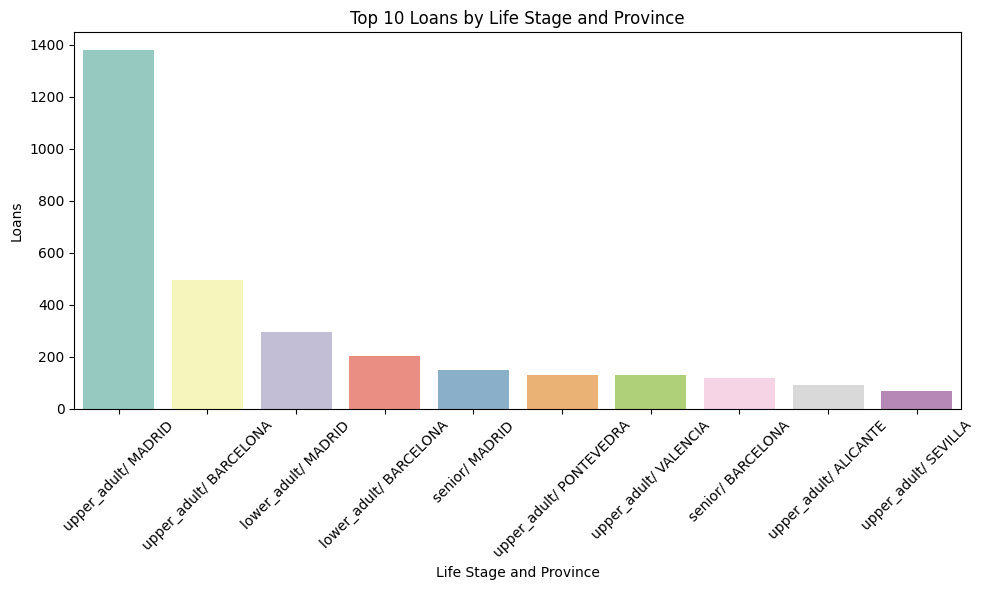

In [59]:
lifestage_province_Loans = df.groupby('life_stage_province')['Loans'].sum().reset_index()

top_10 = lifestage_province_Loans.nlargest(10, 'Loans')

plt.figure(figsize=(10, 6))
sns.barplot(x='life_stage_province', y='Loans', data=top_10, palette='Set3')

plt.title('Top 10 Loans by Life Stage and Province')
plt.xlabel('Life Stage and Province')
plt.ylabel('Loans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-60-af5b572aef98>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='life_stage_province', y='Pensions', data=top_10, palette='Set3')


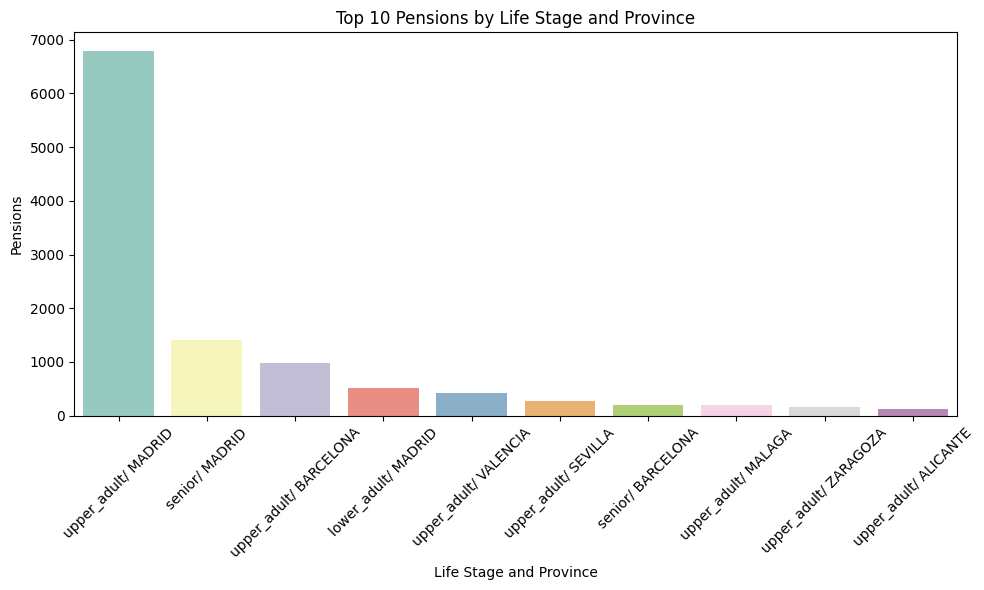

In [60]:
lifestage_province_Pensions = df.groupby('life_stage_province')['Pensions'].sum().reset_index()

top_10 = lifestage_province_Pensions.nlargest(10, 'Pensions')

plt.figure(figsize=(10, 6))
sns.barplot(x='life_stage_province', y='Pensions', data=top_10, palette='Set3')

plt.title('Top 10 Pensions by Life Stage and Province')
plt.xlabel('Life Stage and Province')
plt.ylabel('Pensions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

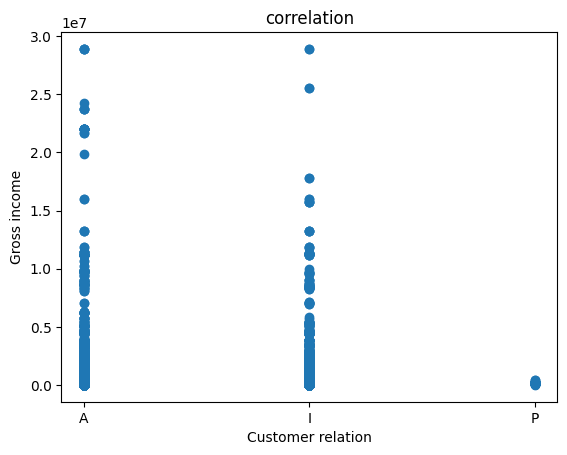

In [61]:
plt.scatter(df['Customer_relation_type_at_the_beginning_of_the_month'], df['Gross_income_of_the_household'])
plt.xlabel('Customer relation')
plt.ylabel('Gross income')
plt.title('correlation')
plt.show()

**Insight**  
The correlation in terms of customer relations, there is no significant difference of gross income between Activa and Inactive.

In [62]:
df['life_stage_province_relation']=df['life_stage_province'] + "/ " + df['Customer_relation_type_at_the_beginning_of_the_month']

<ipython-input-63-04432332414f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='life_stage_province_relation', y='Gross_income_of_the_household', data=top_10, palette='Set3')


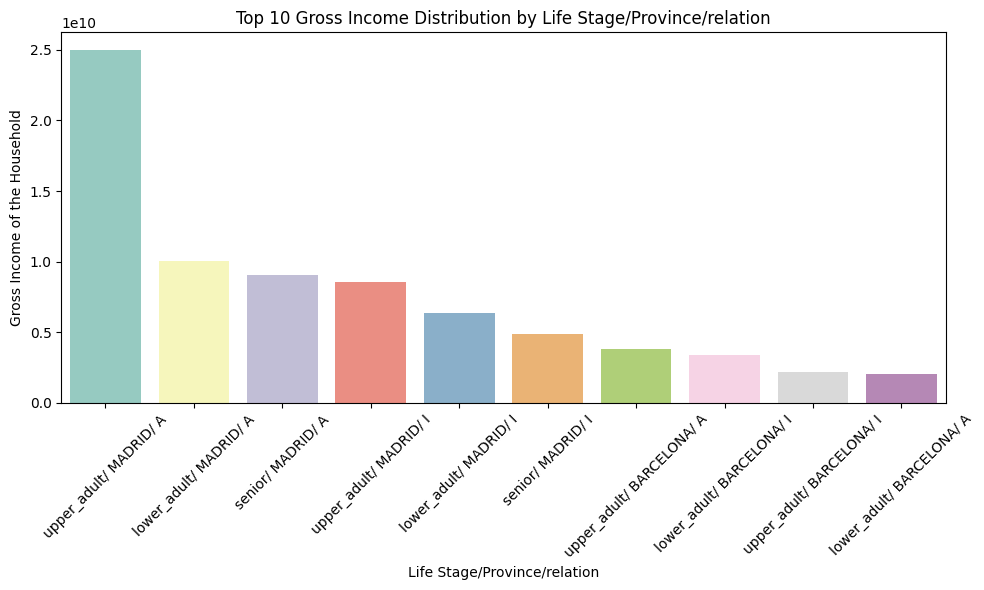

In [63]:
lifestage_province_relation_income = df.groupby('life_stage_province_relation')['Gross_income_of_the_household'].sum().reset_index()

top_10 = lifestage_province_relation_income.nlargest(10, 'Gross_income_of_the_household')

plt.figure(figsize=(10, 6))
sns.barplot(x='life_stage_province_relation', y='Gross_income_of_the_household', data=top_10, palette='Set3')

plt.title('Top 10 Gross Income Distribution by Life Stage/Province/relation')
plt.xlabel('Life Stage/Province/relation')
plt.ylabel('Gross Income of the Household')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insight**   
In the provinces of Madrid and Barcelona, there are mixing Active and Inactive customers.

In [64]:
df['life_stage_province_foreigner']=df['life_stage_province'] + "/ " + df['Foreigner_index']

<ipython-input-65-2954db3267a3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='life_stage_province_foreigner', y='Gross_income_of_the_household', data=top_10, palette='Set3')


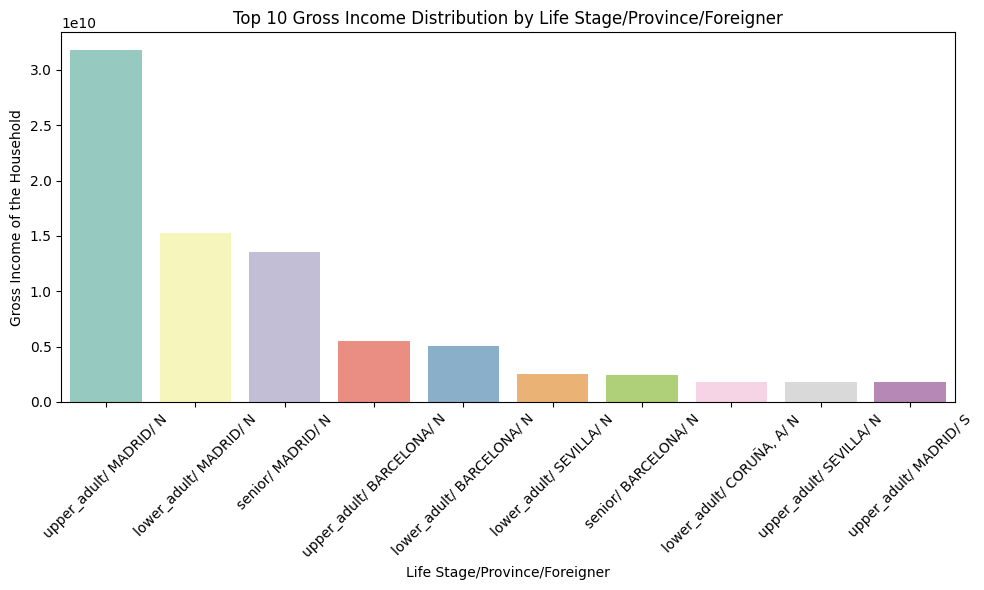

In [65]:
lifestage_province_relation_income = df.groupby('life_stage_province_foreigner')['Gross_income_of_the_household'].sum().reset_index()

top_10 = lifestage_province_relation_income.nlargest(10, 'Gross_income_of_the_household')

plt.figure(figsize=(10, 6))
sns.barplot(x='life_stage_province_foreigner', y='Gross_income_of_the_household', data=top_10, palette='Set3')

plt.title('Top 10 Gross Income Distribution by Life Stage/Province/Foreigner')
plt.xlabel('Life Stage/Province/Foreigner')
plt.ylabel('Gross Income of the Household')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**   
The majority of high-income customers are from Residence (no foreigners) while upper_adult/MADRID/S shows they are foreigners.